In [4]:
import matplotlib
import numpy as np
#matplotlib.use('agg')
import matplotlib.pyplot as plt
image_t=np.loadtxt("/extendplus/3Dcomplex/Distances/dimer_all_0109/masif-ppi/distance/1AGQ_C_D_distance.txt")
image_t.shape
length=np.loadtxt("/extendplus/3Dcomplex/Distances/dimer_all_0109/masif-ppi/distance/1AGQ_C_D_length.txt")

In [6]:
length

array([[91., 95.],
       [91., 95.]])

In [14]:
image_d=np.copy(image_t)
image_d=np.copy(image_t)
image_d_mask=np.copy(image_t)
image_d_mask[0:91,91:]=50
image_d_mask[91:,0:91]=50
image_c=np.copy(image_t)
image_c[image_c<=8]=1
image_c[image_c>8]=0
matrix_A_B_multi=np.copy(image_t)
for d in range(0,36):
    d_u=2.5+d*0.5
    d_l=2.0+d*0.5
    e3=(matrix_A_B_multi<=d_u)&(matrix_A_B_multi>d_l)
    matrix_A_B_multi[e3]=d_l
matrix_A_B_multi[matrix_A_B_multi>20]=50
matrix_A_B_multi[matrix_A_B_multi<2]=1.5
matrix_A_B_multi=(100.0/(matrix_A_B_multi-0.5))+155.0
matrix_A_B_multi[matrix_A_B_multi<160]=0
image_d_multi=matrix_A_B_multi
image_d_multi_mask=np.copy(matrix_A_B_multi)
image_d_multi_mask[0:91,91:]=0
image_d_multi_mask[91:,0:91]=0
image_c_mask=np.copy(image_c)
image_c_mask[0:91,91:]=0
image_c_mask[91:,0:91]=0

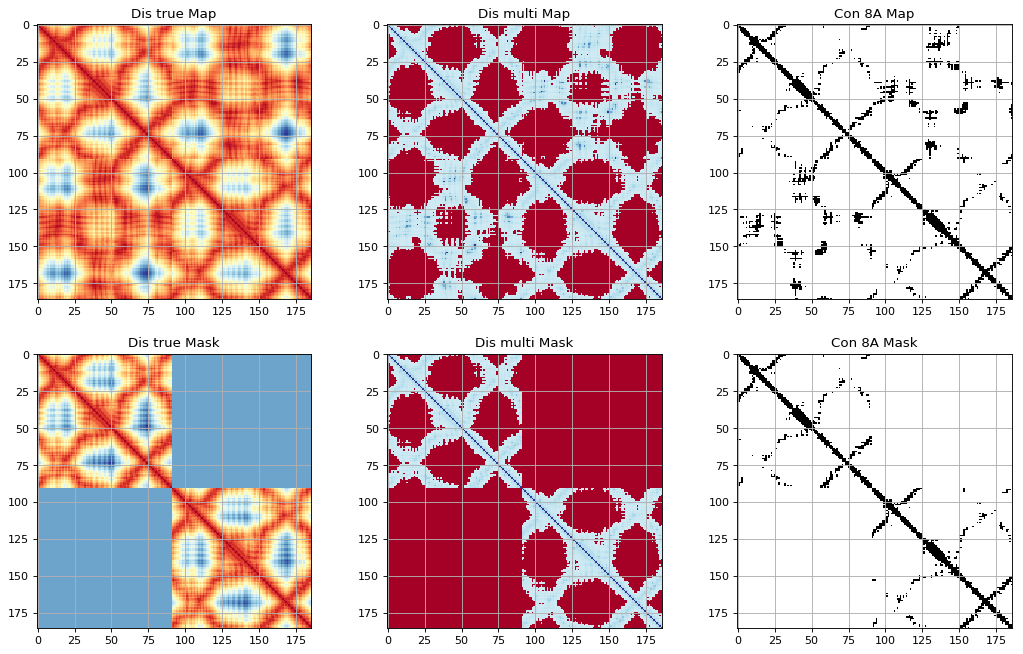

In [25]:
#plt.imshow(image_d_mask, cmap='RdYlBu', interpolation='nearest')
#plt.savefig("1AGQ.dis.jpg")
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', frameon=True, edgecolor='k')
plt.subplot(2, 3, 1)
plt.grid(None)
plt.imshow(image_d, cmap='RdYlBu', interpolation='nearest')
plt.title("Dis true Map")
plt.subplot(2, 3, 2)
plt.grid(None)
plt.imshow(image_d_multi, cmap='RdYlBu', interpolation='nearest')
plt.title("Dis multi Map")
plt.subplot(2, 3, 3)
plt.grid(None)
plt.imshow(image_c, cmap='binary', interpolation='nearest')
plt.title("Con 8A Map")
plt.subplot(2, 3, 4)
plt.grid(None)
plt.imshow(image_d_mask, cmap='RdYlBu', interpolation='nearest')
plt.title("Dis true Mask")
plt.subplot(2, 3, 5)
plt.grid(None)
plt.imshow(image_d_multi_mask, cmap='RdYlBu', interpolation='nearest')
plt.title("Dis multi Mask")
plt.subplot(2, 3, 6)
plt.grid(None)
plt.imshow(image_c_mask, cmap='binary', interpolation='nearest')
plt.title("Con 8A Mask")

plt.savefig("1AGQ.all.jpg")

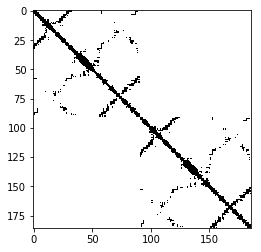

In [27]:
plt.imshow(image_d, cmap='RdYlBu', interpolation='nearest')
plt.savefig("1AGQ.dis.jpg")
plt.imshow(image_d_multi, cmap='RdYlBu', interpolation='nearest')
plt.savefig("1AGQ.dis_mask.jpg")
plt.imshow(image_c, cmap='binary', interpolation='nearest')
plt.savefig("1AGQ.multi_dis.jpg")
plt.imshow(image_d_mask, cmap='RdYlBu', interpolation='nearest')
plt.savefig("1AGQ.multi_dis_mask.jpg")
plt.imshow(image_d_multi_mask, cmap='RdYlBu', interpolation='nearest')
plt.savefig("1AGQ.con.jpg")
plt.imshow(image_c_mask, cmap='binary', interpolation='nearest')
plt.savefig("1AGQ.con_mask.jpg")

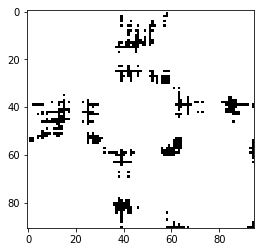

In [28]:
small_c=image_c[0:91,91:]
plt.imshow(small_c, cmap='binary', interpolation='nearest')
plt.savefig("1AGQ.maskcon.jpg")

/home/huanghe/anaconda2/envs/tensorflow2.7/lib/python2.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


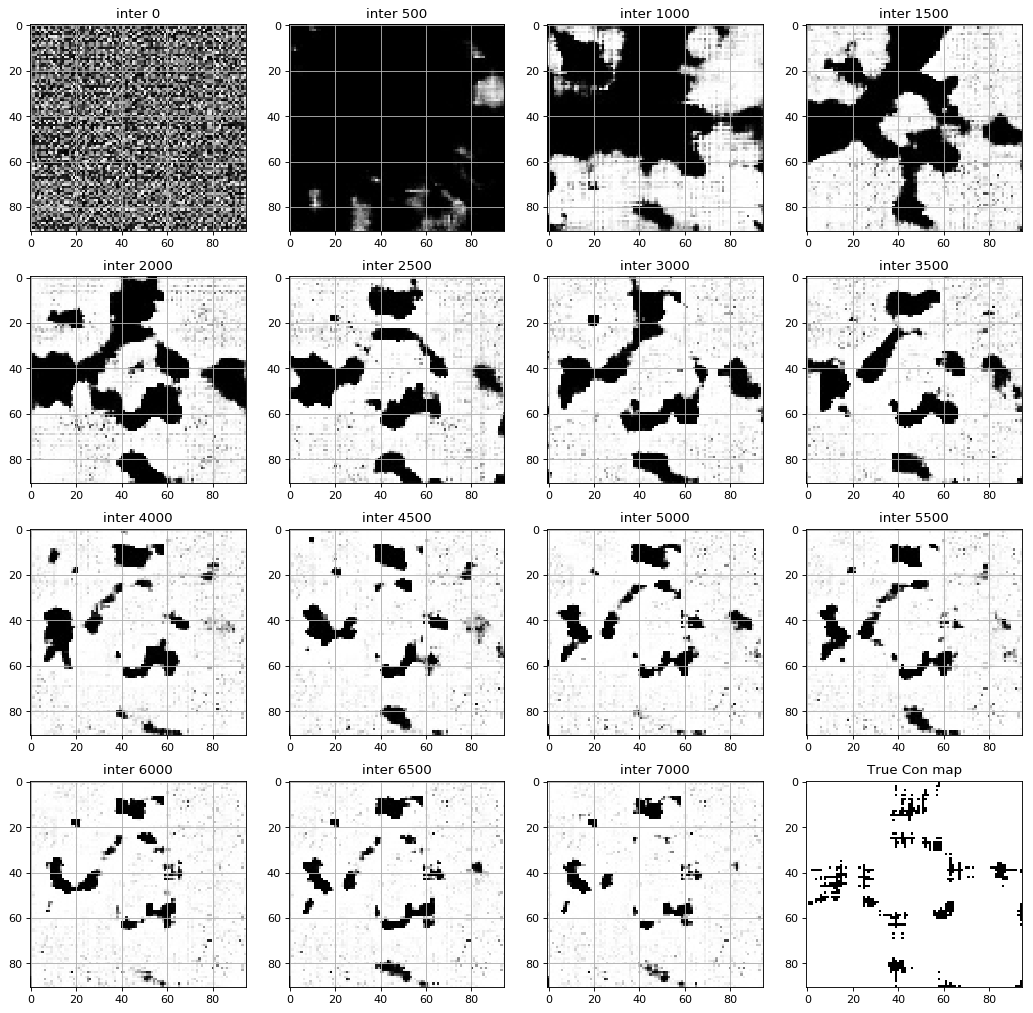

In [35]:
from PIL import Image
import os
import scipy.misc as misc
import skimage.io
output_dir="./1AGQ_process"
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 16), dpi=80, facecolor='w', frameon=True, edgecolor='k')

for i in range(15):
    j=i*4
    ii=i*500
    output_image_name=os.path.join(output_dir,'1AGQ_C_D.'+str(j)+'.jpg')
    l1=91
    l2=95
    L=186
    output_matrix_file_gray=Image.open(output_image_name).convert('L')
    output_matrix_file_temp=misc.imresize(output_matrix_file_gray,[L,L],interp='nearest')
    output_matrix=np.array(output_matrix_file_temp)
    output_sub_matrix=output_matrix[:l1,l1:L]
    #output_sub_matrix[output_sub_matrix>=0.5]=1
    #output_sub_matrix[output_sub_matrix<0.5]=0
    plt.grid(None)
    plt.subplot(4, 4, i+1)
    plt.imshow(output_sub_matrix, cmap='binary', interpolation='nearest')
    plt.title("inter %d" %ii)
plt.grid(None)
plt.subplot(4, 4, 16)
plt.imshow(small_c, cmap='binary', interpolation='nearest')
plt.title("True Con map")
plt.savefig("1AGQ_process.jpg")
#plt.suptitle("Generate process")

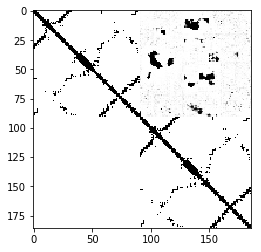

In [39]:
sub_output=np.copy(output_sub_matrix)
plt.imshow(sub_output, cmap='binary', interpolation='nearest')
plt.savefig("1AGQ_suboutput.jpg")
output=np.copy(image_c_mask)
output[0:91,91:]=output_sub_matrix/255.
plt.imshow(output, cmap='binary', interpolation='nearest')
plt.savefig("1AGQ_output.jpg")

In [38]:
image_c_mask.shape

(186, 186)

In [24]:
plt.savefig("1AGQ.all.jpg")

<Figure size 432x288 with 0 Axes>

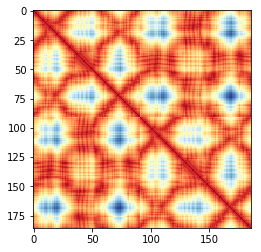

In [10]:
plt.imshow(image_d, cmap='RdYlBu', interpolation='nearest')

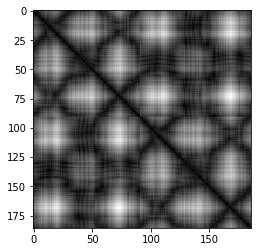

In [11]:
plt.imshow(image_d, cmap='gray', interpolation='nearest')

In [ ]:
image_d=np.copy(image_t)
image_d_mask=np.copy(image_t)
image_d_mask[0:91,91:]=50
image_d_mask[91:,0:91]=50
image_c=np.copy(image_t)
image_c[image_c<=8]=1
image_c[image_c>8]=0
matrix_A_B_multi=np.copy(image_t)
for d in range(0,36):
    d_u=2.5+d*0.5
    d_l=2.0+d*0.5
    e3=(matrix_A_B_multi<=d_u)&(matrix_A_B_multi>d_l)
    matrix_A_B_multi[e3]=d_l
matrix_A_B_multi[matrix_A_B_multi>20]=50
matrix_A_B_multi[matrix_A_B_multi<2]=1.5
matrix_A_B_multi=(100.0/(matrix_A_B_multi-0.5))+155.0
matrix_A_B_multi[matrix_A_B_multi<160]=0
image_d_multi=matrix_A_B_multi
image_d_multi_mask=np.copy(matrix_A_B_multi)
image_d_multi_mask[0:91,91:]=0
image_d_multi_mask[91:,0:91]=0
image_c_mask=np.copy(image_c)
image_c_mask[0:91,91:]=0
image_c_mask[91:,0:91]=0
plt.imshow(image_d_mask, cmap='gray', interpolation='nearest')